In [1]:
import numpy as np
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


# Entrainement des Données

In [2]:
train_dir = '../PROJET2/data/Images/'
validation_dir = "../PROJET2/data/Validation/"

nTrain = 600
nVal = 150

image_size=224

# Entrainement des Couches Hautes du VGG16

### Generators

In [5]:
def prepare_ImageDataGenerator(train_dir, validation_dir, image_size):
    from keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(
          rescale=1./255,
          rotation_range=20,
          width_shift_range=0.2,
          height_shift_range=0.2,
          horizontal_flip=True,
          fill_mode='nearest')

    validation_datagen = ImageDataGenerator(
          rescale=1./255,
          fill_mode='nearest')


    # Change the batchsize according to your system RAM
    train_batchsize = 100
    val_batchsize = 20

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

    validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)
    
    return train_datagen, validation_datagen, train_generator, validation_generator


In [6]:
def prepare_model(image_size = 224):
    
    from keras.applications import VGG16
    #Nous chargeons le modèle VGG16 pré-entrainé
  
    vgg_conv = VGG16(weights='imagenet', include_top=False, 
                     input_shape=(image_size, image_size, 3))
    
    ### Nous allons entrainer uniquement les 4 plus haut niveaux 
    # Les autres restent freezé (pour ne pas les réentrainer
    for layer in vgg_conv.layers[:-4]:
        layer.trainable = False

    # Check the trainable status of the individual layers
    for layer in vgg_conv.layers:
        print(layer, layer.trainable)
        
    from keras import models
    from keras import layers
    from keras import optimizers

    # Create the model
    model = models.Sequential()

    # Add the vgg convolutional base model
    model.add(vgg_conv)

    # Add new layers
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(120, activation='softmax'))

    # Show a summary of the model. Check the number of trainable parameters
    #####model.summary()
    
    return model


# Lancement des Opérations
1. Chargement du modèle
2. Préparation des ImageDataGenerator

In [7]:
## Preparation du Model 
model = prepare_model(image_size=image_size)

## Préparation des ImageDataGenerator
train_datagen, validation_datagen, train_generator, validation_generator = prepare_ImageDataGenerator(
    train_dir, validation_dir, image_size)

<keras.engine.input_layer.InputLayer object at 0x1831770470> False
<keras.layers.convolutional.Conv2D object at 0x18315c3128> False
<keras.layers.convolutional.Conv2D object at 0x18315c3320> False
<keras.layers.pooling.MaxPooling2D object at 0x1831596ac8> False
<keras.layers.convolutional.Conv2D object at 0x1831596b38> False
<keras.layers.convolutional.Conv2D object at 0x1831770908> False
<keras.layers.pooling.MaxPooling2D object at 0x18317db470> False
<keras.layers.convolutional.Conv2D object at 0x18317dbe48> False
<keras.layers.convolutional.Conv2D object at 0x18341f0400> False
<keras.layers.convolutional.Conv2D object at 0x1834208668> False
<keras.layers.pooling.MaxPooling2D object at 0x1834226470> False
<keras.layers.convolutional.Conv2D object at 0x1834226e48> False
<keras.layers.convolutional.Conv2D object at 0x1834256400> False
<keras.layers.convolutional.Conv2D object at 0x1834271630> False
<keras.layers.pooling.MaxPooling2D object at 0x183428e470> False
<keras.layers.convoluti

### Compilation du modèle 

```python
# On compile le modèle
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])
```

## Entrainement du modèle

```python
NB_EPOCH = 30 

# On entraine les 4 plus hautes couches 
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size ,
    epochs=NB_EPOCH,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/validation_generator.batch_size,
    workers = 1, 
    use_multiprocessing = False, 
    verbose=1)
```

```
Epoch 1/30
165/164 [==============================] - 292s 2s/step - loss: 3.7746 - acc: 0.1215 - val_loss: 3.3056 - val_acc: 0.1980
Epoch 2/30
165/164 [==============================] - 274s 2s/step - loss: 3.2435 - acc: 0.2084 - val_loss: 2.7816 - val_acc: 0.2864
Epoch 3/30
165/164 [==============================] - 275s 2s/step - loss: 2.8881 - acc: 0.2688 - val_loss: 2.9081 - val_acc: 0.2806
Epoch 4/30
165/164 [==============================] - 276s 2s/step - loss: 2.5821 - acc: 0.3263 - val_loss: 2.4265 - val_acc: 0.3618
Epoch 5/30
165/164 [==============================] - 275s 2s/step - loss: 2.3593 - acc: 0.3733 - val_loss: 2.2218 - val_acc: 0.4020
Epoch 6/30
165/164 [==============================] - 276s 2s/step - loss: 2.1754 - acc: 0.4096 - val_loss: 2.3332 - val_acc: 0.3791
Epoch 7/30
165/164 [==============================] - 275s 2s/step - loss: 2.0009 - acc: 0.4502 - val_loss: 2.0512 - val_acc: 0.4505
Epoch 8/30
165/164 [==============================] - 274s 2s/step - loss: 1.8795 - acc: 0.4781 - val_loss: 2.0703 - val_acc: 0.4457
Epoch 9/30
165/164 [==============================] - 275s 2s/step - loss: 1.7477 - acc: 0.5133 - val_loss: 1.9092 - val_acc: 0.4789
Epoch 10/30
165/164 [==============================] - 276s 2s/step - loss: 1.6267 - acc: 0.5424 - val_loss: 1.9698 - val_acc: 0.4673
Epoch 11/30
165/164 [==============================] - 275s 2s/step - loss: 1.5271 - acc: 0.5642 - val_loss: 1.8587 - val_acc: 0.5000
Epoch 12/30
165/164 [==============================] - 275s 2s/step - loss: 1.4313 - acc: 0.5922 - val_loss: 1.8386 - val_acc: 0.5062
Epoch 13/30
165/164 [==============================] - 274s 2s/step - loss: 1.3333 - acc: 0.6120 - val_loss: 1.8485 - val_acc: 0.5017
Epoch 14/30
165/164 [==============================] - 275s 2s/step - loss: 1.2510 - acc: 0.6337 - val_loss: 1.8144 - val_acc: 0.4966
Epoch 15/30
165/164 [==============================] - 274s 2s/step - loss: 1.1798 - acc: 0.6528 - val_loss: 1.7893 - val_acc: 0.5168
Epoch 16/30
165/164 [==============================] - 273s 2s/step - loss: 1.0981 - acc: 0.6735 - val_loss: 1.8214 - val_acc: 0.5173
Epoch 17/30
165/164 [==============================] - 273s 2s/step - loss: 1.0168 - acc: 0.6959 - val_loss: 1.9164 - val_acc: 0.5101
Epoch 18/30
165/164 [==============================] - 279s 2s/step - loss: 0.9729 - acc: 0.7071 - val_loss: 1.7964 - val_acc: 0.5312
Epoch 19/30
165/164 [==============================] - 273s 2s/step - loss: 0.9141 - acc: 0.7236 - val_loss: 1.9376 - val_acc: 0.5070
Epoch 20/30
165/164 [==============================] - 275s 2s/step - loss: 0.8572 - acc: 0.7374 - val_loss: 1.9178 - val_acc: 0.5132
Epoch 21/30
165/164 [==============================] - 275s 2s/step - loss: 0.7980 - acc: 0.7537 - val_loss: 1.9587 - val_acc: 0.5195
Epoch 22/30
165/164 [==============================] - 276s 2s/step - loss: 0.7456 - acc: 0.7683 - val_loss: 2.0091 - val_acc: 0.5312
Epoch 23/30
165/164 [==============================] - 279s 2s/step - loss: 0.7119 - acc: 0.7819 - val_loss: 2.1148 - val_acc: 0.5199
Epoch 24/30
165/164 [==============================] - 276s 2s/step - loss: 0.6707 - acc: 0.7951 - val_loss: 1.9922 - val_acc: 0.5274
Epoch 25/30
165/164 [==============================] - 274s 2s/step - loss: 0.6225 - acc: 0.8066 - val_loss: 2.0214 - val_acc: 0.5243
Epoch 26/30
165/164 [==============================] - 276s 2s/step - loss: 0.5891 - acc: 0.8159 - val_loss: 2.1275 - val_acc: 0.5106
Epoch 27/30
165/164 [==============================] - 275s 2s/step - loss: 0.5644 - acc: 0.8243 - val_loss: 2.1445 - val_acc: 0.5195
Epoch 28/30
165/164 [==============================] - 275s 2s/step - loss: 0.5227 - acc: 0.8368 - val_loss: 2.3036 - val_acc: 0.5375
Epoch 29/30
165/164 [==============================] - 276s 2s/step - loss: 0.5124 - acc: 0.8413 - val_loss: 2.1425 - val_acc: 0.5180
Epoch 30/30
165/164 [==============================] - 281s 2s/step - loss: 0.4739 - acc: 0.8488 - val_loss: 2.0921 - val_acc: 0.5360
Tps :  2:17:59.299970

```


### Sauvegarde des poids du modèle

```python
# Save the model
model.save('output/models/test1_v1.h5')

model.save_weights('output/models/test1_v1_poids_.h5'`
```

# CHARGEMENT DES POIDS DU MODEL SAUVEGARDE

### Chargement des Poids entrainés

In [8]:
model.load_weights('models/test1_v3_poids_.h5')

## Lancement des Prédictions des données de Validation
### Visualisation des résultats

In [9]:
train_batchsize = 100
val_batchsize = 20

# Get the filenames from the generator
fnames = validation_generator.filenames
 
# Get the ground truth from generator
ground_truth = validation_generator.classes
 
# Get the label to class mapping from the generator
label2index = validation_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(
    validation_generator, 
    steps=validation_generator.samples/validation_generator.batch_size,
    verbose=1)

209/208 [==============================] - 1177s 6s/step


In [10]:
import numpy as np
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))



No of errors = 1789/4162


In [12]:
1-1789/4162

0.5701585776069198

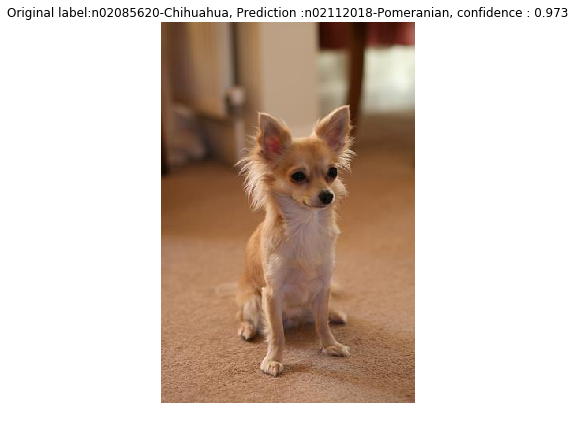

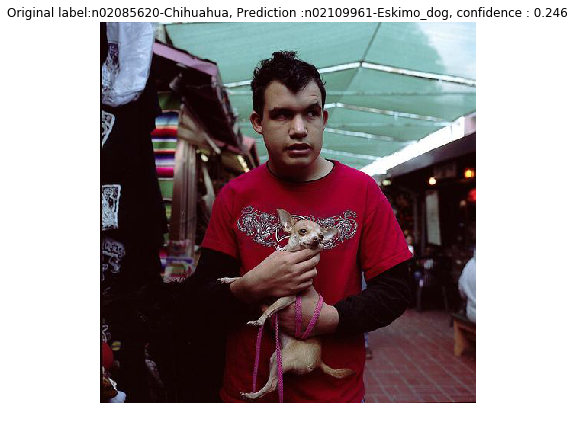

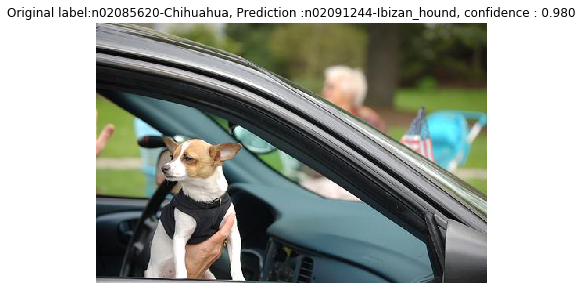

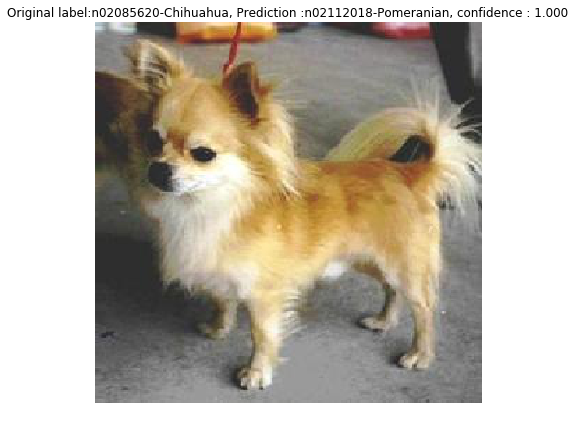

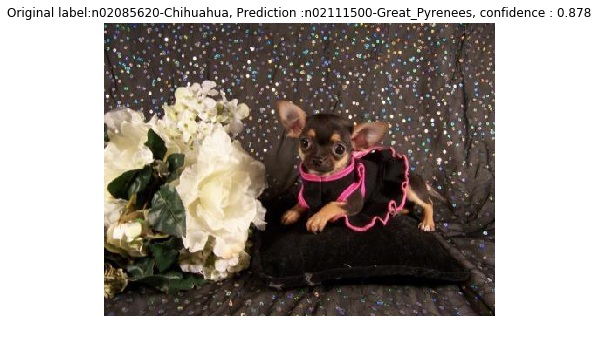

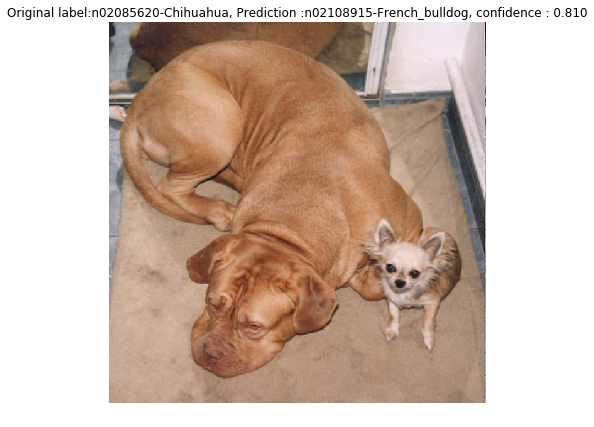

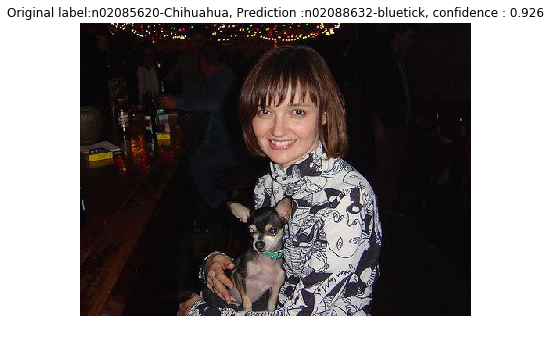

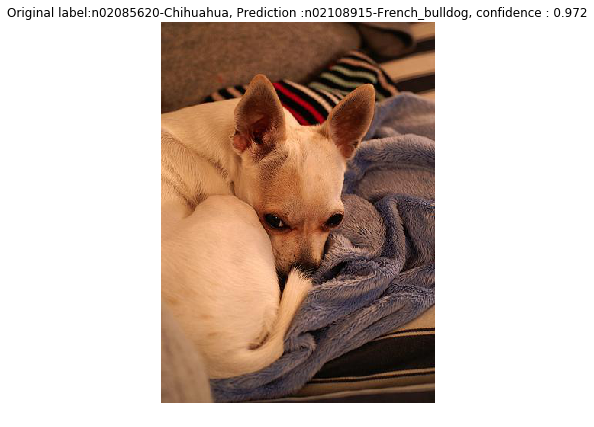

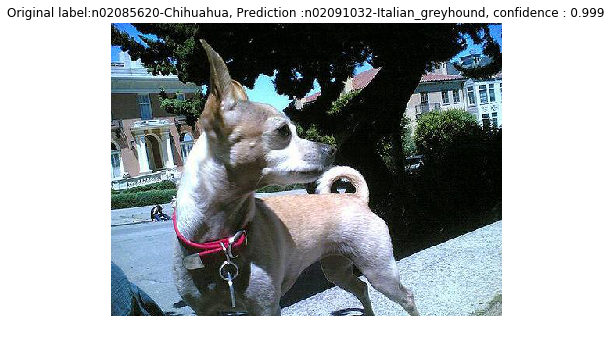

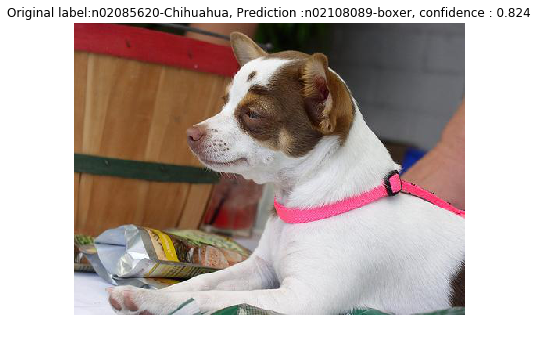

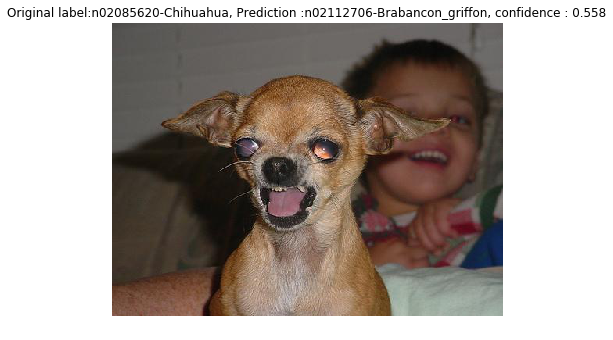

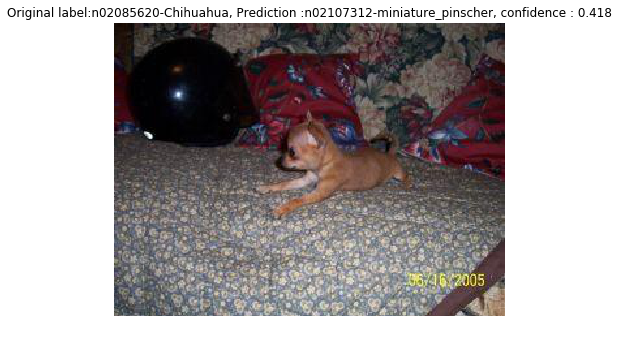

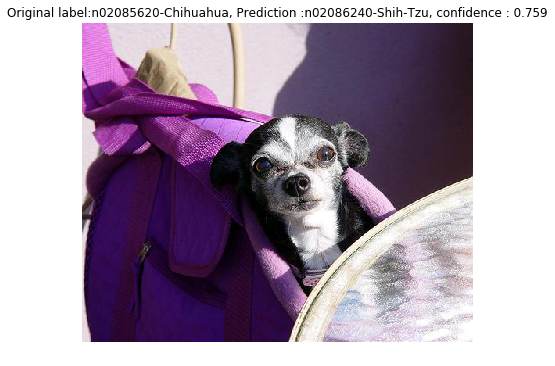

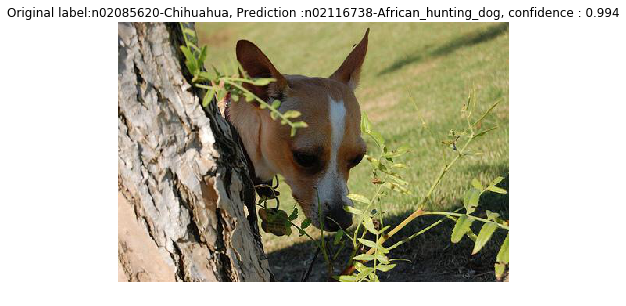

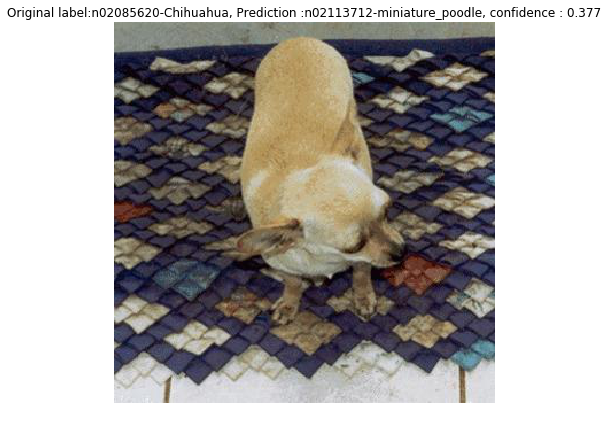

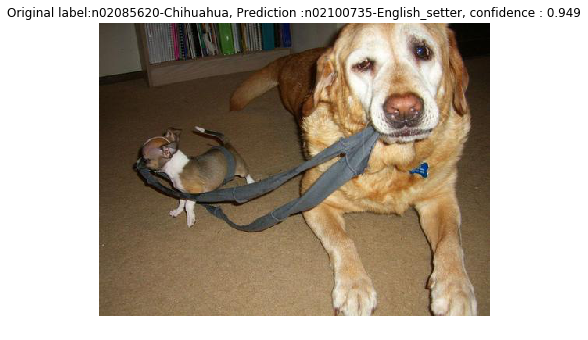

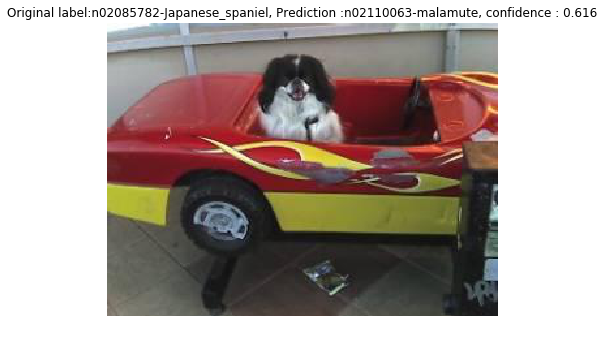

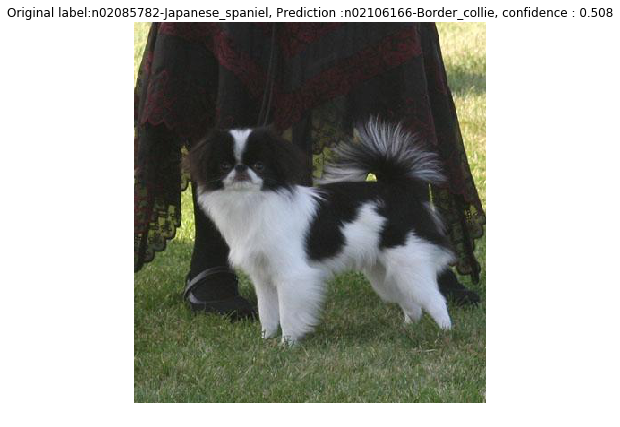

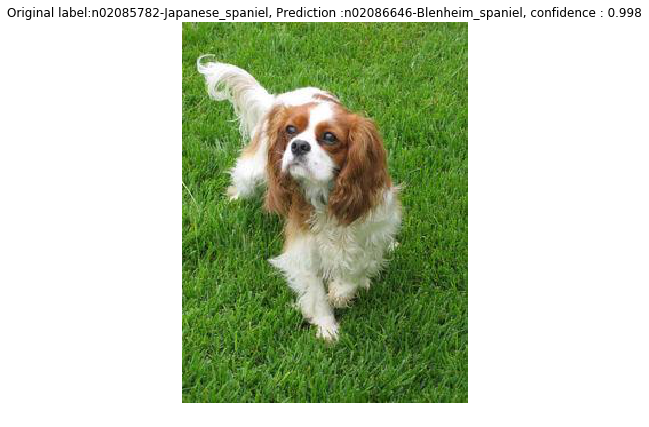

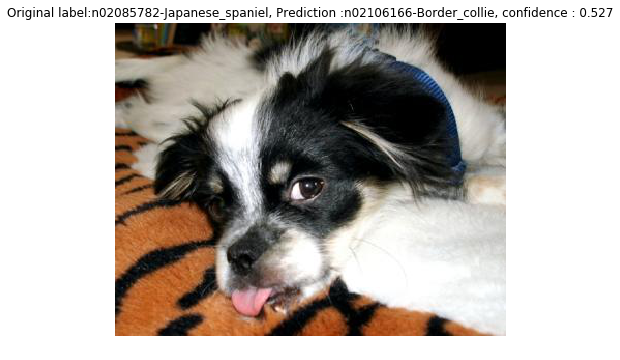

In [15]:
# Show the errors
for i in range(len(errors[:20])):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
     
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

## Sauvegarde de l'ensemble des résultats

In [17]:
import pandas as pd

## Noms des vrais classes 
m_filenames = [ i.split('/')[0] for i in validation_generator.filenames]

## Nom des predictions
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
m_predictions = [labels[k] for k in predicted_classes]

results=pd.DataFrame({"Filename":np.array(m_filenames),
                      "Predictions":m_predictions})

#results=pd.DataFrame({"Filename":filenames,
#                      "Predictions":predictions})
results.to_csv("results_new.csv",index=False)

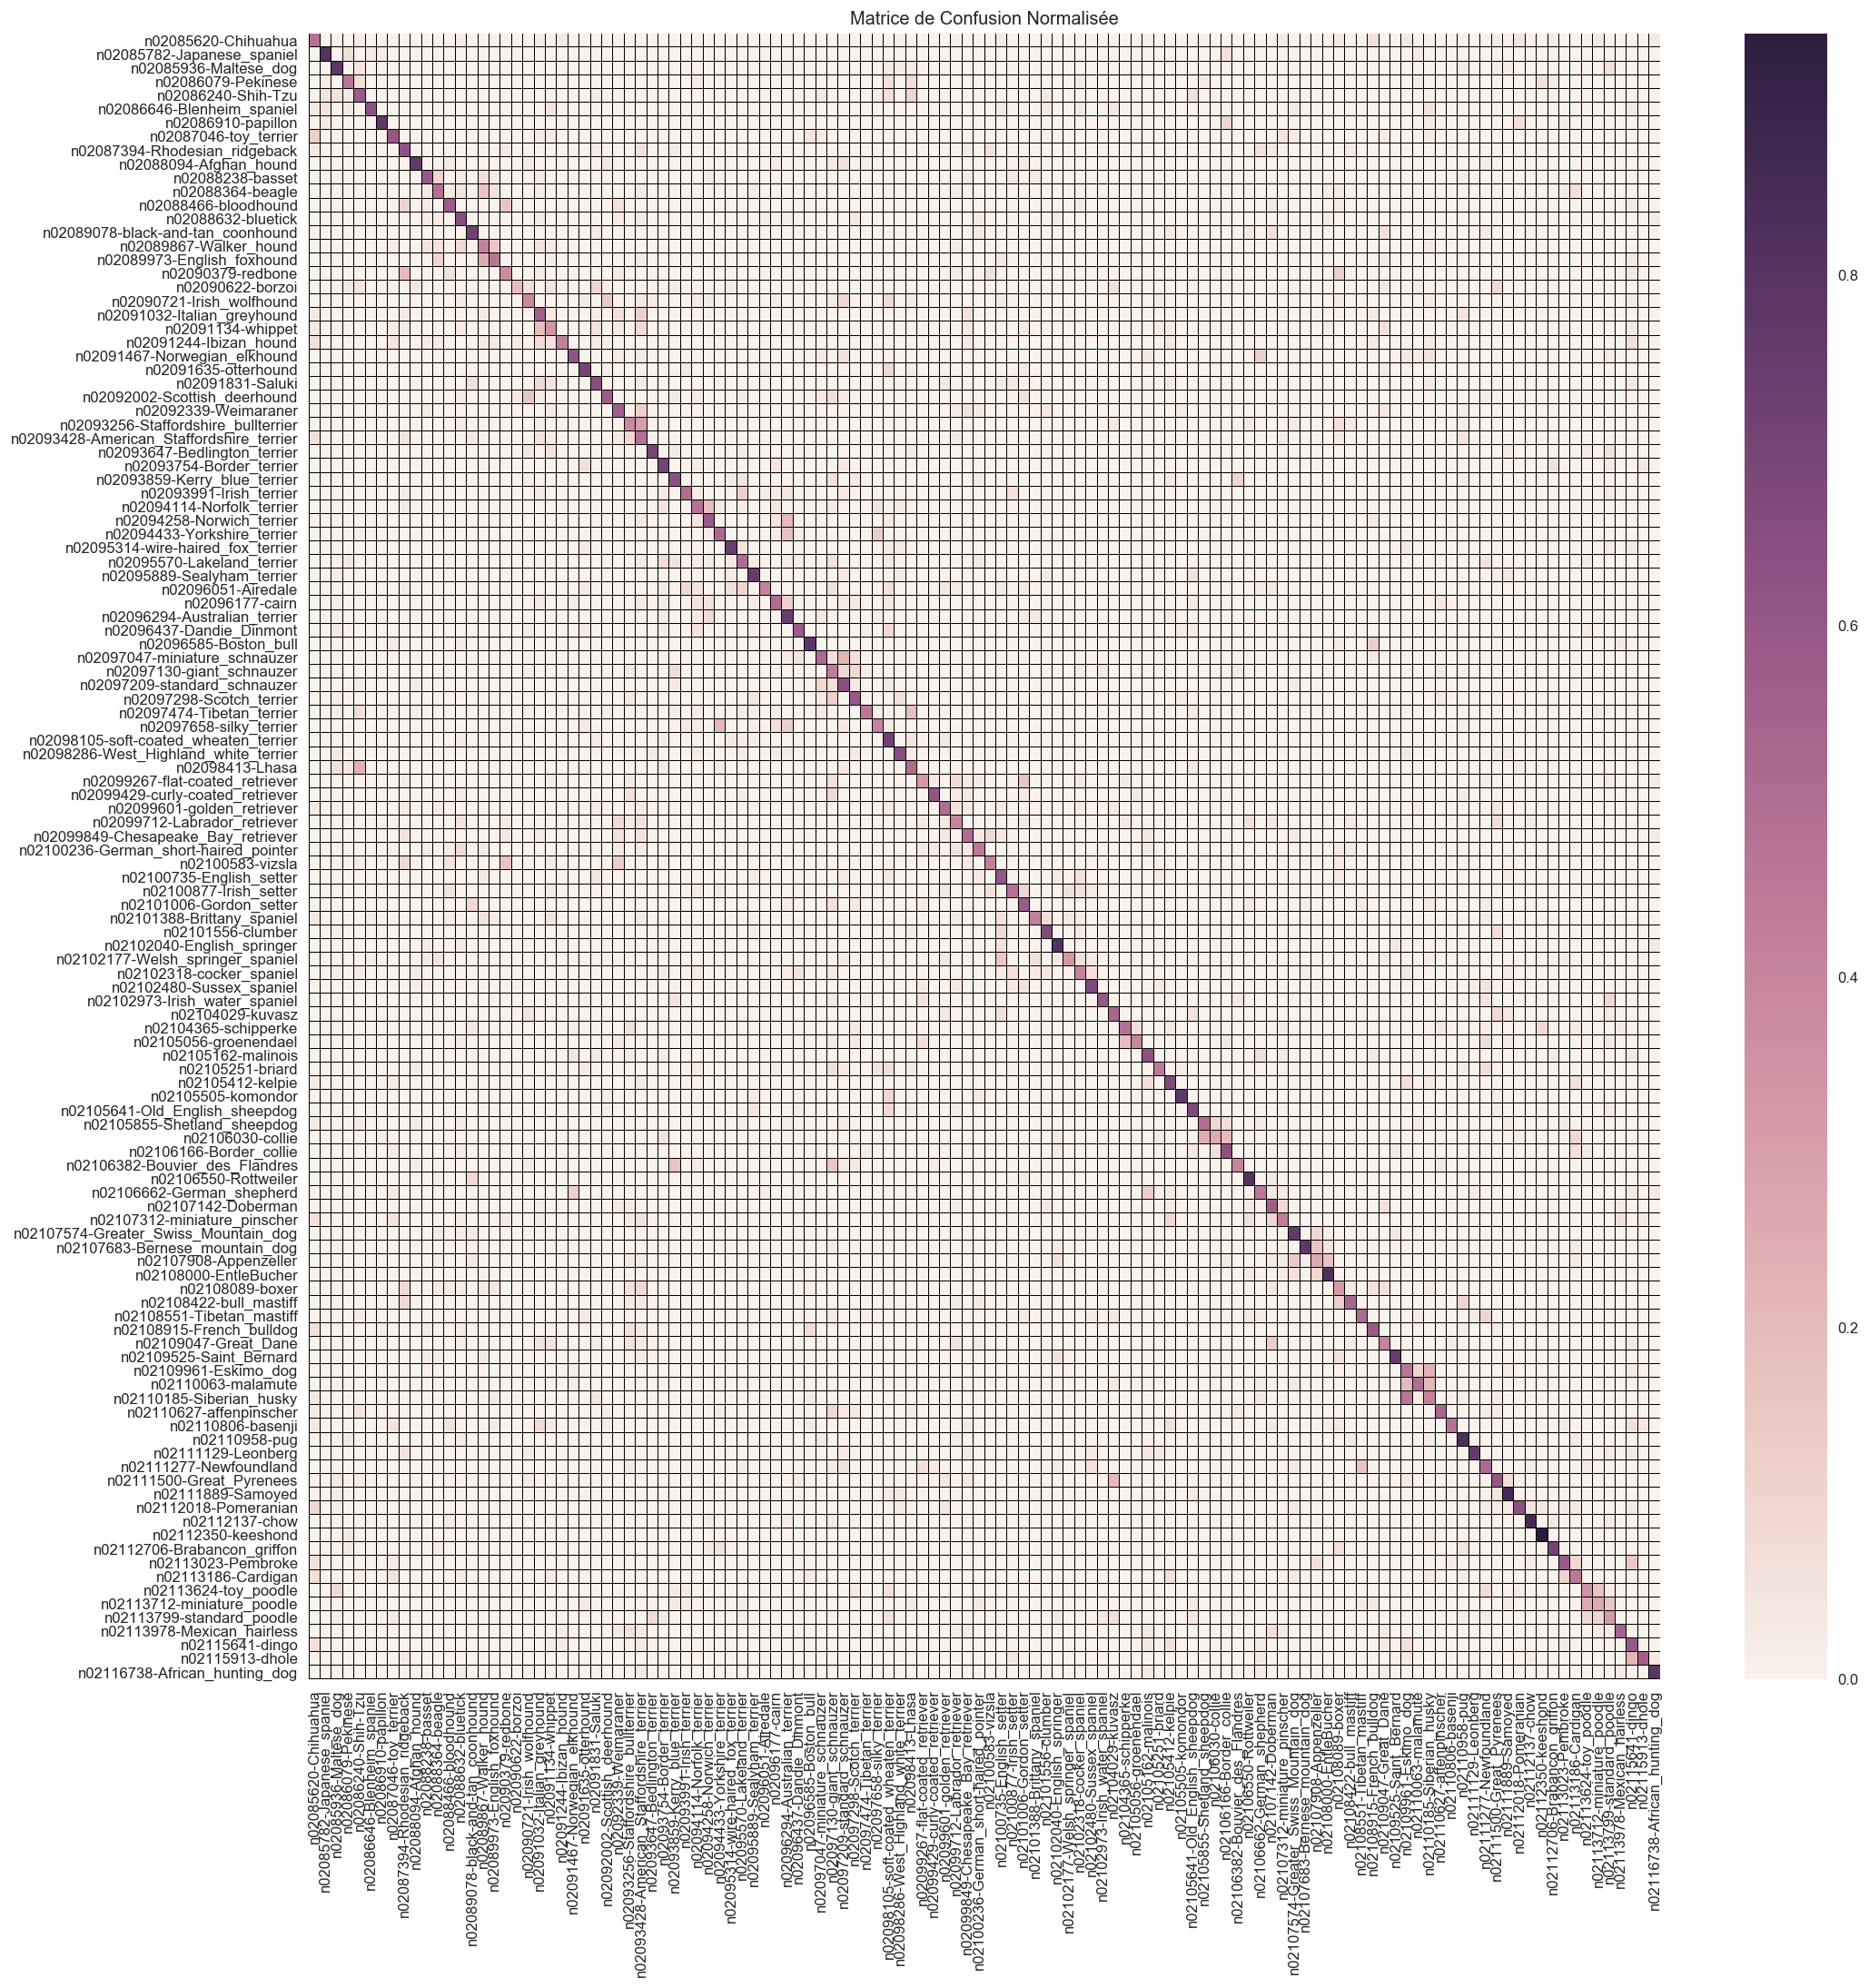

In [36]:
from sklearn.metrics import confusion_matrix

cm11 = pd.DataFrame(confusion_matrix(results['Filename'], results.Predictions), )
m_class = idx2label.values()
cm11.columns = list(m_class)
cm11.index = list(m_class)
cm = cm11.astype('float') / cm11.sum(axis=1)

import seaborn as sns; sns.set()

ax = plt.figure(figsize=(20,20), dpi=120)
ax = sns.heatmap(cm, linewidths=0.02,linecolor='k' ,  annot_kws={"size": 6.0})
plt.title('Matrice de Confusion Normalisée')
plt.show()